In [ ]:
# Update sklearn to prevent version mismatches
#!pip install sklearn --upgrade

In [ ]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
#!pip install joblib

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.options.display.max_rows = 4000

# Read the CSV and Perform Basic Data Cleaning

In [3]:
df = pd.read_csv("diagnosis-of-covid-19-and-its-clinical-spectrum.csv")
# Drop the null columns where all values are null
# df = df.dropna(axis='columns', how='all')
# Drop the null rows
# df = df.dropna()
df.head()
df_positive = df.loc[df["sars_cov_2_exam_result"]=="positive"]

In [4]:
df_positive.dtypes

patient_id                                             object
patient_age_quantile                                    int64
sars_cov_2_exam_result                                 object
patient_addmited_to_regular_ward_1_yes_0_no            object
patient_addmited_to_semi_intensive_unit_1_yes_0_no     object
patient_addmited_to_intensive_care_unit_1_yes_0_no     object
hematocrit                                            float64
hemoglobin                                            float64
platelets                                             float64
mean_platelet_volume                                  float64
red_blood_cells                                       float64
lymphocytes                                           float64
mean_corpuscular_hemoglobin_concentration_mchc        float64
leukocytes                                            float64
basophils                                             float64
mean_corpuscular_hemoglobin_mch                       float64
eosinoph

In [5]:
df_positive.count()


patient_id                                            558
patient_age_quantile                                  558
sars_cov_2_exam_result                                558
patient_addmited_to_regular_ward_1_yes_0_no           558
patient_addmited_to_semi_intensive_unit_1_yes_0_no    558
patient_addmited_to_intensive_care_unit_1_yes_0_no    558
hematocrit                                             83
hemoglobin                                             83
platelets                                              83
mean_platelet_volume                                   81
red_blood_cells                                        83
lymphocytes                                            83
mean_corpuscular_hemoglobin_concentration_mchc         83
leukocytes                                             83
basophils                                              83
mean_corpuscular_hemoglobin_mch                        83
eosinophils                                            83
mean_corpuscul

In [6]:
df_positive.isnull().sum()

patient_id                                              0
patient_age_quantile                                    0
sars_cov_2_exam_result                                  0
patient_addmited_to_regular_ward_1_yes_0_no             0
patient_addmited_to_semi_intensive_unit_1_yes_0_no      0
patient_addmited_to_intensive_care_unit_1_yes_0_no      0
hematocrit                                            475
hemoglobin                                            475
platelets                                             475
mean_platelet_volume                                  477
red_blood_cells                                       475
lymphocytes                                           475
mean_corpuscular_hemoglobin_concentration_mchc        475
leukocytes                                            475
basophils                                             475
mean_corpuscular_hemoglobin_mch                       475
eosinophils                                           475
mean_corpuscul

In [7]:
df_positive_selected_features = (df_positive[["patient_addmited_to_intensive_care_unit_1_yes_0_no",
                                              "patient_age_quantile",
                                              "hematocrit",
                                              "hemoglobin",
                                              "platelets",
                                              "mean_platelet_volume",
                                              "red_blood_cells",
                                              "lymphocytes",
                                              "basophils",
                                              "mean_corpuscular_hemoglobin_mch",
                                              "eosinophils",
                                              "mean_corpuscular_volume_mcv",
                                              "monocytes",
                                              "red_blood_cell_distribution_width_rdw",
                                              "neutrophils",
                                              "urea",
                                              "proteina_c_reativa_mg_dl",
#                                               "creatinine",
#                                               "potassium",
#                                               "sodium",
#                                               "influenza_b_rapid_test",
#                                               "influenza_a_rapid_test"
#                                               "serum_glucose",
#                                               "coronavirus_hku1",
#                                               "influenza_a",
#                                               "influenza_b",
#                                               "parainfluenza_1",
#                                               "coronavirusnl63",
#                                               "coronavirusoc43",
#                                               "chlamydophila_pneumoniae",
#                                               "adenovirus","parainfluenza_4",
#                                               "coronavirusoc43"
                                             ]])

df_positive_selected_features_drop = df_positive_selected_features.dropna()
df_positive_selected_features_drop.count()


patient_addmited_to_intensive_care_unit_1_yes_0_no    44
patient_age_quantile                                  44
hematocrit                                            44
hemoglobin                                            44
platelets                                             44
mean_platelet_volume                                  44
red_blood_cells                                       44
lymphocytes                                           44
basophils                                             44
mean_corpuscular_hemoglobin_mch                       44
eosinophils                                           44
mean_corpuscular_volume_mcv                           44
monocytes                                             44
red_blood_cell_distribution_width_rdw                 44
neutrophils                                           44
urea                                                  44
proteina_c_reativa_mg_dl                              44
dtype: int64

# Select your features (columns)

In [8]:
# Set features. This will also be used as your x values.
#selected_features = df[['names', 'of', 'selected', 'features', 'here']]
# X= df_positive.drop(["patient_addmited_to_intensive_care_unit_1_yes_0_no","sars_cov_2_exam_result","patient_id","patient_addmited_to_regular_ward_1_yes_0_no","patient_addmited_to_semi_intensive_unit_1_yes_0_no"], axis=1)
X=df_positive_selected_features_drop.drop("patient_addmited_to_intensive_care_unit_1_yes_0_no", axis =1)
# y= df[["koi_disposition"]].values.reshape(-1, 1)
# y= df_positive["patient_addmited_to_intensive_care_unit_1_yes_0_no"]
y= df_positive_selected_features_drop["patient_addmited_to_intensive_care_unit_1_yes_0_no"]


X.shape



(44, 16)

In [9]:
y.value_counts()

f    39
t     5
Name: patient_addmited_to_intensive_care_unit_1_yes_0_no, dtype: int64

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split



In [11]:
# from sklearn.compose import ColumnTransformer
# from sklearn.compose import make_column_transformer
# from sklearn.compose import make_column_selector

# ct = make_column_transformer(
# #     (StandardScaler(), make_column_selector(dtype_include=np.number)),
#     (OneHotEncoder(), make_column_selector(dtype_include=object))
# )
# ct.fit_transform(X)

In [12]:
# X

# Create a Train Test Split


In [13]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,patient_age_quantile,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,basophils,mean_corpuscular_hemoglobin_mch,eosinophils,mean_corpuscular_volume_mcv,monocytes,red_blood_cell_distribution_width_rdw,neutrophils,urea,proteina_c_reativa_mg_dl
5204,13,0.350958,0.416252,-1.936897,1.917961,-0.338755,0.540121,-1.140144,1.380422,-0.203417,1.367966,3.640448,-0.448160,-1.504130,-0.737209,-0.521453
5226,16,-0.427254,-0.210308,-1.271122,-0.325903,-0.374015,-0.031325,-0.223767,0.282719,-0.709090,-0.074163,0.357547,-0.978899,0.143034,-0.439476,1.006559
5016,12,-1.319907,-1.150148,0.273981,-0.325903,-1.308424,-1.268037,0.081693,0.439533,-0.709090,0.266340,0.646442,-0.625073,1.232949,-0.811643,-0.477739
5004,15,-0.244145,-0.210308,-0.567660,0.683835,-0.444537,0.710702,-0.223767,0.439533,-0.709090,0.446606,0.830284,-0.536617,-0.717424,-0.737209,-0.330700
4899,18,1.609830,1.732028,-0.693278,-0.662483,1.600584,-1.071869,0.387152,0.021361,-0.582671,-0.334546,3.377816,0.967144,0.159424,0.453725,-0.306856


In [14]:
y_test.value_counts()

f    9
t    2
Name: patient_addmited_to_intensive_care_unit_1_yes_0_no, dtype: int64

In [15]:
y_train.value_counts()

f    30
t     3
Name: patient_addmited_to_intensive_care_unit_1_yes_0_no, dtype: int64

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [16]:
# # Scale your data
# from sklearn.preprocessing import MinMaxScaler
# X_minmax = MinMaxScaler().fit(X_train)
# #y_minmax = MinMaxScaler().fit(y_train)

# X_train_minmax = X_minmax.transform(X_train)
# X_test_minmax = X_minmax.transform(X_test)
# #y_train_minmax = y_minmax.transform(y_train)
# #y_test_minmax = y_minmax.transform(y_test)

# Train the Model



In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [22]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=2000)
rf = rf.fit(X_train, y_train)
acc = rf.score(X_test, y_test)
print(f"Training Data Score: {rf.score(X_train, y_train)}")
print(f"Testing Data Score: {rf.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.8181818181818182


In [23]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 2000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Random Forest Tuning

In [24]:
## Random Forest Tuning
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [10,20,30],
    'max_features': [2,3,4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier(n_estimators=2000)
# Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 2)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                             n_jobs = -1, verbose = 2)


In [25]:
# Train the model with GridSearch
grid_search.fit(X_train, y_train)
grid_search.best_params_


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed:  1.6min finished


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [32]:
best_grid = grid_search.best_estimator_
print(f"Training Data Score: {best_grid.score(X_train, y_train)}")
print(f"Testing Data Score: {best_grid.score(X_test, y_test)}")

Training Data Score: 0.9090909090909091
Testing Data Score: 0.8181818181818182


In [33]:
best_model_rf= best_grid.fit(X_train,y_train)
print(f"Training Data Score: {best_model_rf.score(X_train, y_train)}")
print(f"Testing Data Score: {best_model_rf.score(X_test, y_test)}")
# print(f"Training Data Score: {best_grid.score(X_train_minmax, y_train)}")
# print(f"Testing Data Score: {best_grid.score(X_test_minmax, y_test)}")

Training Data Score: 0.9090909090909091
Testing Data Score: 0.8181818181818182


In [34]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}
0.9142857142857143


In [35]:
feature_importance= pd.DataFrame({
    "feature": X.columns.to_list(),
    "importance": best_model_rf.feature_importances_
    
})
feature_importance

,feature,importance
0,patient_age_quantile,0.098044
1,hematocrit,0.057690
2,hemoglobin,0.038267
3,platelets,0.081332
4,mean_platelet_volume,0.040309
5,red_blood_cells,0.043860
6,lymphocytes,0.101302
7,basophils,0.028604
8,mean_corpuscular_hemoglobin_mch,0.037505
9,eosinophils,0.023713


In [36]:
feature_importance= feature_importance.sort_values(by="importance", ascending=False)

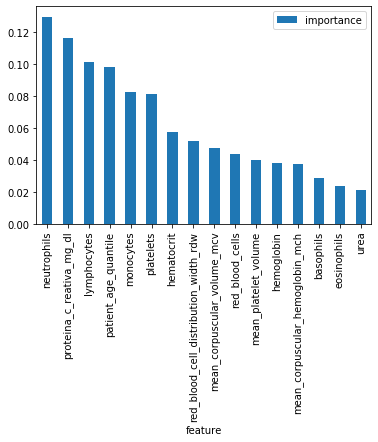

In [37]:
feature_importance.plot.bar(x="feature",y="importance")

# CREATE MLFlow

In [79]:
!rm -rf saved_model

In [82]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import f1_score, recall_score, precision_score

name = "ICU-RF"
with mlflow.start_run(run_name=name) as run:
	run_id = run.info.run_id
	model = rf
	model.fit(X_train, y_train)
	
	mlflow.log_params({
		"model name": "Random Forest",
	})
	mlflow.log_metrics({
		"f1": f1_score(y_test, model.predict(X_test), pos_label="t"),
		"recall": recall_score(y_test, model.predict(X_test), pos_label="t"),
		"precision": precision_score(y_test, model.predict(X_test), pos_label="t")
	})
	
	mlflow.sklearn.save_model(model, "saved_model", 
						  serialization_format=mlflow.sklearn.SERIALIZATION_FORMAT_CLOUDPICKLE)
	mlflow.log_artifact("saved_model")

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
f1_score(y_test, model.predict(X_test), pos_label="t")

0.0